# Single Model Uses

This notebook shows some uses of the forced baroptric model with singel model runs. See model_ensemble for uses as it pertains to ensembles of runs

In [9]:
# This directive tells the notebook to add interactive plots in the notebook
#%matplotlib widget
#%matplotlib
import sys
sys.path.append('../src')  # Add the 'src' directory to the Python path
from model.solver import Solver #bm3_barotropic_model packages
from model.sphere import Sphere
from utils import constants, plotting, parcel_tracking,animations

import time
import numpy as np
import random
import xarray as xr

import matplotlib.pyplot as plt    

from tqdm import tqdm
from importlib import reload

from IPython.display import display, clear_output, HTML, FileLink  # Some technical stuff, used to display animation

We may simply integrate a single model and plot the resulting output at the final integration step

In [2]:
T= constants.day2sec*5 #total integration time

st = Sphere(M=63)
st.add_seaice()

##if we want to start with some structure in the vorticity here's some options
##otherwise, start at equilibrium conditions

#k0=3
#vortp = 1e-5 * np.exp( -0.5 * (st.glats - 45.)**2 / 10**2 ) * np.cos(k0 * st.rlons)
#thetap = np.zeros(vortp.shape)
#st.set_ics([vortp,thetap])

params=dict(nu=1e-15, tau = 1/8, diffusion_order=3,dt=1800, ofreq=4,
            forcing_type='rededdy', vort_linear = False, temp_linear=False)

S = Solver(st, T= T, **params)

sln = S.integrate_dynamics(verbose=True)

100%|████████████████████████████████████████| 240/240 [00:01<00:00, 174.01it/s]


In [3]:
sln

<xarray.Dataset>
Dimensions:  (y: 64, time: 61, x: 127)
Coordinates:
  * y        (y) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * time     (time) float64 0.0 7.2e+03 1.44e+04 ... 4.248e+05 4.32e+05
  * x        (x) float64 -178.6 -175.7 -172.9 -170.1 ... 170.1 172.9 175.7 178.6
Data variables:
    vort     (time, y, x) float64 0.0 0.0 0.0 ... -3.105e-07 -3.058e-07
    vortp    (time, y, x) float64 3.137e-06 3.137e-06 ... -3.448e-06 -3.443e-06
    u        (time, y, x) float64 0.3727 0.3727 0.3727 ... -0.3276 -0.4225
    v        (time, y, x) float64 -9.507e-08 -2.701e-07 ... -1.949 -1.897
    thetap   (time, y, x) float64 0.0 0.0 0.0 0.0 ... 0.05775 0.05178 0.04564
    theta    (time, y, x) float64 255.1 255.1 255.1 255.1 ... 245.1 245.1 245.1

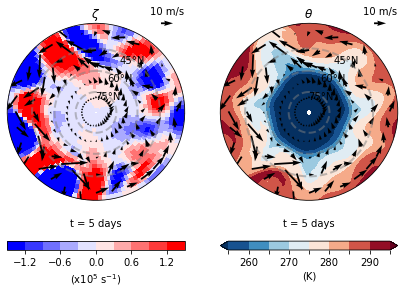

In [4]:
tidx=-1
#tidx=int(Nt/ofreq)-1
f,ax = plotting.plot_overview(sln.isel(time=tidx), levels=[np.linspace(-1.5,1.5,11),np.arange(255,300,5)], var=['vort','theta'])
#f.savefig('./singlerun.png',dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#careful..this takes quite a while to run. ~4s/frame
%matplotlib
starttime = time.time()
plotting.overview_animation(sln, times = [0,T], xs=None, filename = './overview_nonlinear_seaice.gif')
print('time taken to animate: ', time.time()-starttime)

MovieWriter ffmpeg unavailable; using Pillow instead.


0.0
0.0
0.002785515320334262
0.005571030640668524
0.008356545961002786
0.011142061281337047
0.013927576601671309
0.016713091922005572
0.019498607242339833
0.022284122562674095
0.025069637883008356
0.027855153203342618
0.03064066852367688
0.033426183844011144
0.036211699164345405
0.03899721448467967
0.04178272980501393
0.04456824512534819
0.04735376044568245
0.05013927576601671
0.052924791086350974
0.055710306406685235
0.0584958217270195
0.06128133704735376
0.06406685236768803
0.06685236768802229
0.06963788300835655
0.07242339832869081
0.07520891364902507
0.07799442896935933
0.0807799442896936
0.08356545961002786
0.08635097493036212
0.08913649025069638
0.09192200557103064
0.0947075208913649
0.09749303621169916
0.10027855153203342
0.10306406685236769
0.10584958217270195
0.10863509749303621
0.11142061281337047
0.11420612813370473
0.116991643454039
0.11977715877437325
0.12256267409470752
0.12534818941504178
0.12813370473537605
0.1309192200557103
0.13370473537604458
0.13649025069637882
0.13

### Tracking parcels
We can use a parcel tracking routine to help show spread growth

In [6]:
#dsr = sln.rename(dict(x='lon',y='lat')) #rename x,y to lon,lat
# Reassign longitude coordinates between -180 and 180E
#dsr = dsr.assign_coords(lon=(((dsr.lon + 180) % 360) - 180))
#dsr = dsr.sortby('lon')

x0 = [(-100., l) for l in np.linspace(45, 70, 4)] #initial position of parcel
t0=0. #t0=(0,T)
ts, xs = parcel_tracking.calculate_trajectories(sln, x0, t0 = sln.time.isel(time=0).data)


Integrating 4 trajectories for [5.].
  1. From -100 E, 45 N at 0.0.
  2. From -100 E, 53.3333 N at 0.0.
  3. From -100 E, 61.6667 N at 0.0.
  4. From -100 E, 70 N at 0.0.


100%|███████████████████████████████████████████| 59/59 [00:04<00:00, 13.74it/s]

Completed 60 of 60 timesteps.


In [10]:
%matplotlib
animations.overview_animation(sln, times = [0,T],filename = 'nonlinear_seaice_wtraj.gif', xs=xs,ts=ts)

Using matplotlib backend: <object object at 0x2b1296845fc0>


MovieWriter ffmpeg unavailable; using Pillow instead.


0.0
0.0
0.01694915254237288
0.03389830508474576
0.05084745762711865
0.06779661016949153
0.0847457627118644
0.1016949152542373
0.11864406779661017
0.13559322033898305
0.15254237288135594
0.1694915254237288
0.1864406779661017
0.2033898305084746
0.22033898305084745
0.23728813559322035
0.2542372881355932
0.2711864406779661
0.288135593220339
0.3050847457627119
0.3220338983050847
0.3389830508474576
0.3559322033898305
0.3728813559322034
0.3898305084745763
0.4067796610169492
0.423728813559322
0.4406779661016949
0.4576271186440678
0.4745762711864407
0.4915254237288136
0.5084745762711864
0.5254237288135594
0.5423728813559322
0.559322033898305
0.576271186440678
0.5932203389830508
0.6101694915254238
0.6271186440677966
0.6440677966101694
0.6610169491525424
0.6779661016949152
0.6949152542372882
0.711864406779661
0.7288135593220338
0.7457627118644068
0.7627118644067796
0.7796610169491526
0.7966101694915254
0.8135593220338984
0.8305084745762712
0.847457627118644
0.864406779661017
0.8813559322033898
0.